In [1]:
import yfinance
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
portfolio_composition = [('XOM',0.5),('CVX',0.2),('DVN',0.3)]

returns = pd.DataFrame({})

In [3]:
for t in portfolio_composition:
  name = t[0]
  ticker = yfinance.Ticker(name)
  data = ticker.history(interval="1d",start="2021-02-01",end="2021-04-01")
  data['return_%s' % (name)] = data['Close'].pct_change(1)

  returns = returns.merge(data[['return_%s' % (name)]],how="left").dropna()

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [62]:
returns

,return_XOM,return_CVX,return_DVN
0,0.003904,0.007083,0.001045
1,0.008643,0.000126,-0.003001
2,-0.003142,-0.003768,-0.005888
3,-0.004012,0.001765,0.001975
4,0.011220,0.017743,-0.013662
...,...,...,...
2509,0.005004,0.005431,0.029839
2510,-0.003841,0.000083,0.011819
2511,0.001571,0.002161,-0.006782
2512,-0.003422,-0.002488,-0.023900


In [101]:
def simulate_returns(historical_returns,forecast_days):
  return historical_returns.sample(n = 56, replace = True).reset_index(drop = True)

In [118]:
simulate_returns(returns['return_DVN'],1000)

0    -0.026014
1     0.051252
2    -0.039056
3     0.018170
4    -0.012546
5     0.010638
6    -0.021851
7    -0.011538
8     0.016716
9    -0.010817
10    0.016603
11    0.028286
12    0.010947
13   -0.008467
14    0.004696
15    0.008425
16   -0.006728
17    0.013870
18    0.006188
19   -0.017463
20    0.027174
21   -0.019280
22    0.005157
23   -0.008586
24    0.007890
25    0.004161
26   -0.036660
27    0.011377
28    0.026862
29   -0.018014
30   -0.020961
31   -0.001912
32    0.026441
33    0.002452
34   -0.071168
35   -0.010375
36   -0.004093
37   -0.009781
38    0.010541
39    0.015933
40    0.001844
41   -0.002204
42    0.023189
43    0.033962
44    0.020795
45    0.071534
46    0.002395
47    0.009429
48   -0.055935
49   -0.010823
50   -0.030408
51   -0.051209
52    0.010256
53    0.052049
54   -0.023900
55   -0.034618
Name: return_DVN, dtype: float64

In [103]:
def simulate_portfolio(historical_returns,composition,forecast_days):
  result = 0
  for t in composition:
    name,weight = t[0],t[1]
    s = simulate_returns(historical_returns['return_%s' % (name)], forecast_days)
    result = result + s * weight
  
  return(result)

In [120]:
simulate_portfolio(returns,portfolio_composition,1095)

0    -0.014294
1     0.004384
2    -0.004139
3     0.009043
4     0.000730
5     0.000279
6    -0.000290
7     0.002671
8    -0.009001
9     0.012706
10    0.007833
11   -0.003481
12   -0.004608
13   -0.020496
14    0.010446
15   -0.002858
16    0.022274
17   -0.011207
18    0.010670
19   -0.011185
20    0.000173
21    0.000647
22    0.013064
23   -0.001078
24   -0.006873
25   -0.003937
26   -0.013925
27   -0.000493
28   -0.005478
29    0.004671
30   -0.009666
31    0.011361
32   -0.001260
33   -0.006426
34   -0.003169
35   -0.003307
36    0.002736
37    0.011121
38    0.025633
39   -0.009816
40   -0.014021
41   -0.018908
42    0.011626
43    0.015961
44    0.003403
45    0.013070
46   -0.003779
47    0.009847
48    0.013771
49   -0.010448
50    0.006930
51   -0.001531
52    0.007711
53   -0.008291
54    0.005998
55    0.013887
dtype: float64

In [105]:
def simulate_modified_returns(historical_returns,forecast_days,correct_mean_by):
  h = historical_returns.copy()

  new_series = h + correct_mean_by

  return new_series.sample(n=forecast_days,replace=True).reset_index(drop=True)

In [106]:
def simulate_modified_portfolio(historical_returns,composition,forecast_days,correction):
  result = 0
  for t in composition:
        # t is ('XOM',0.5)
    name,weight = t[0],t[1]
    s = simulate_modified_returns(historical_returns['return_%s' % (name)], forecast_days, correction)
    result = result + s * weight
  
  return(result)

In [107]:
def simulation(historical_returns,composition,forecast_days,n_iterations,correction):
  simulated_portfolios = None

  for i in range(n_iterations):
    sim = simulate_modified_portfolio(historical_returns,composition,forecast_days,correction)

    sim_port = pd.DataFrame({'returns_%d' % (i) : sim})

    if simulated_portfolios is None:
      simulated_portfolios = sim_port
    else:
      simulated_portfolios = simulated_portfolios.join(sim_port)
    
  return simulated_portfolios

In [124]:
returns.mean(axis=0)

return_XOM    0.000199
return_CVX    0.000402
return_DVN   -0.000117
dtype: float64

In [125]:
simulated_portfolios = simulation(returns,portfolio_composition,1095,200,-0.001)

In [126]:
simulated_portfolios.head()

,returns_0,returns_1,returns_2,returns_3,returns_4,returns_5,returns_6,returns_7,returns_8,returns_9,...,returns_190,returns_191,returns_192,returns_193,returns_194,returns_195,returns_196,returns_197,returns_198,returns_199
0,0.002995,-0.004362,-0.004129,-0.020466,0.013459,0.007028,-0.000214,0.002648,-0.007980,0.002707,...,-0.013140,0.003067,0.003760,0.009985,0.012641,-0.009363,-0.007350,-0.008705,-0.004904,0.006691
1,-0.002568,0.009432,0.003375,-0.005892,0.005052,-0.000336,0.009743,0.004493,-0.008744,-0.000153,...,-0.002185,0.004136,0.007223,0.001782,0.003506,0.004246,0.004620,-0.002381,-0.007820,0.003175
2,0.000311,-0.015051,-0.003754,-0.006017,0.003331,-0.001322,-0.002376,-0.002012,-0.002976,-0.009721,...,0.016828,-0.013438,-0.006910,-0.015117,-0.015789,-0.002656,0.003602,0.003721,-0.002576,-0.004197
3,-0.002779,0.001743,-0.006816,0.000238,-0.006694,-0.003530,-0.001437,-0.003515,-0.007068,0.003846,...,0.007889,-0.014719,0.005889,0.000079,-0.012863,-0.004476,-0.009256,0.000053,0.004609,-0.002439
4,-0.025510,0.006620,0.024813,-0.005176,0.003663,0.008940,-0.004230,0.004872,0.021283,0.014451,...,0.002421,0.003370,0.017635,-0.005388,0.015737,-0.012667,-0.007870,0.013892,-0.016554,-0.011122


In [127]:
percentile_5th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,5),axis=1)
percentile_95th = simulated_portfolios.cumsum().apply(lambda x : np.percentile(x,95),axis=1)
average_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x),axis=1)

In [128]:
print(percentile_5th.tail(1))
print(percentile_95th.tail(1))
print(average_port.tail(1))

1094   -1.477159
dtype: float64
1094   -0.417075
dtype: float64
1094   -0.949482
dtype: float64


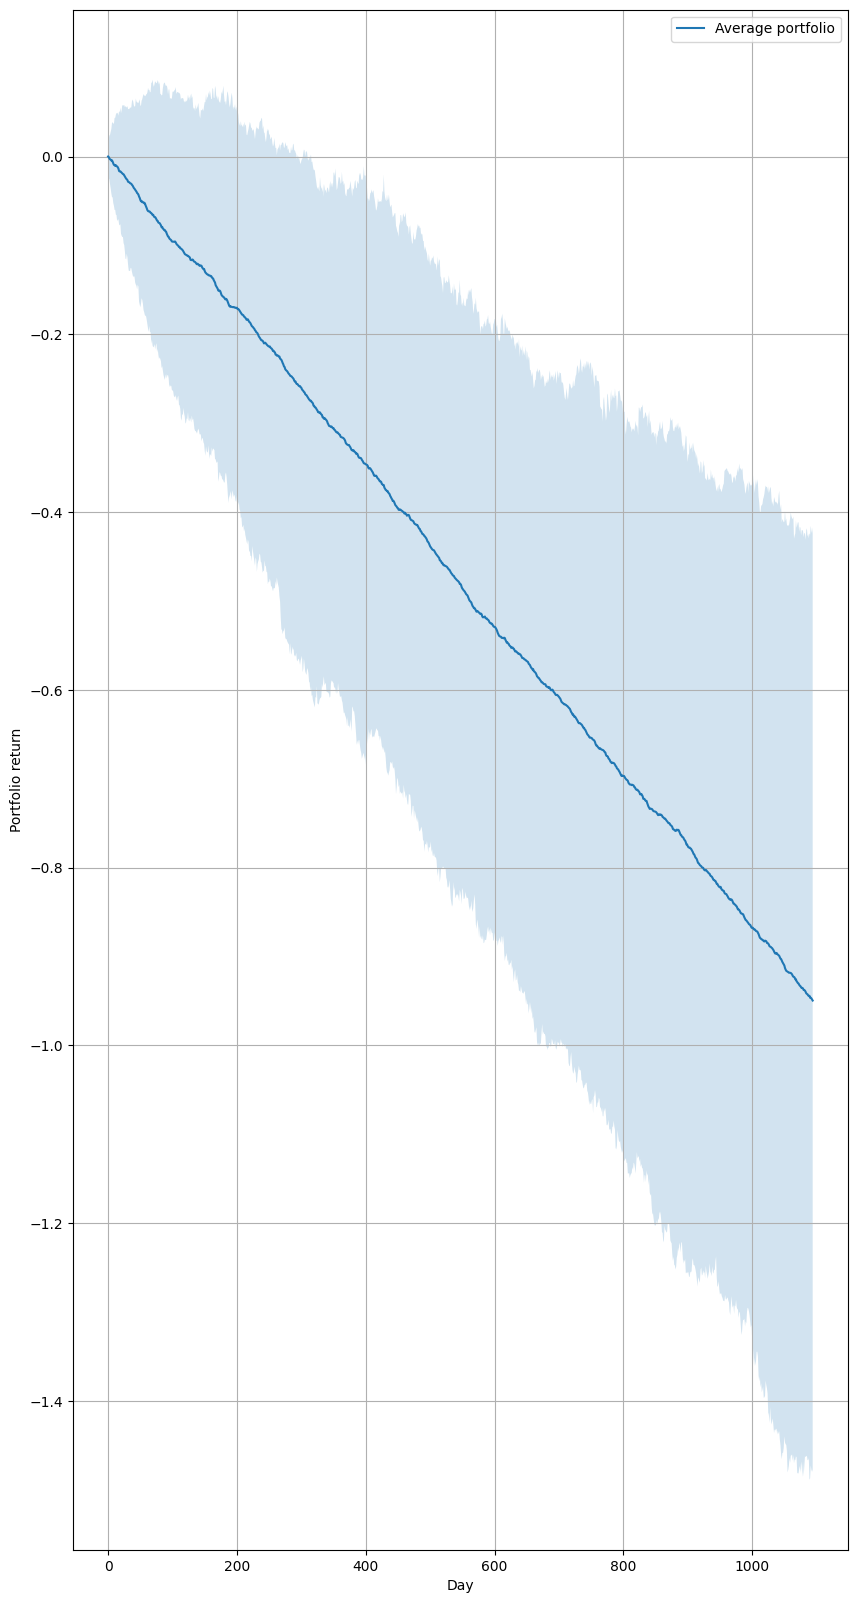

In [137]:
x = range(1095)

plt.rcParams['figure.figsize'] = [10, 20]

plt.plot(x,average_port,label="Average portfolio")
plt.xlabel("Day")
plt.ylabel("Portfolio return")


plt.fill_between(x, percentile_5th, percentile_95th,alpha=0.2)
plt.grid()
plt.legend()

plt.show()

In [138]:

target_return = 0.02

target_prob_port = simulated_portfolios.cumsum().apply(lambda x : np.mean(x > target_return),axis=1)

In [139]:
target_prob_port.tail(1)

1094    0.0
dtype: float64

In [140]:
err_bars = np.sqrt(target_prob_port*(1-target_prob_port)/10)

In [141]:
err_bars.tail(1)

1094    0.0
dtype: float64

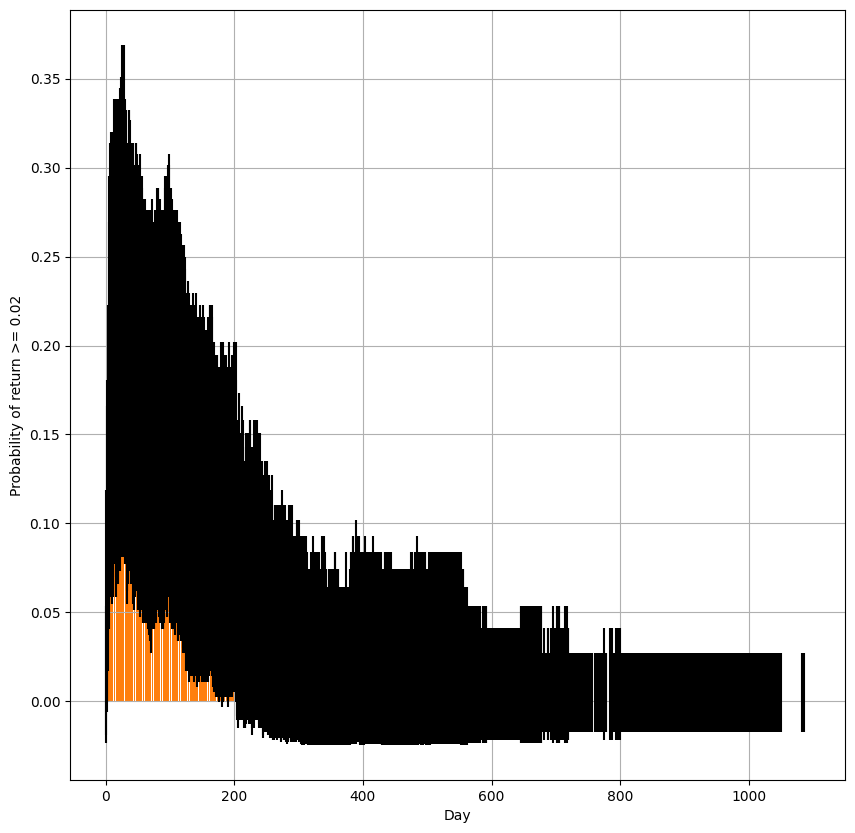

In [143]:
x = range(1095)

plt.rcParams['figure.figsize'] = [10, 10]

plt.bar(x,target_prob_port,yerr = err_bars)

plt.xlabel("Day")
plt.ylabel("Probability of return >= %.2f" % (target_return))

plt.grid()

plt.show()

In [144]:
sharpe_indices = simulated_portfolios.apply(lambda x : np.mean(x)/np.std(x))

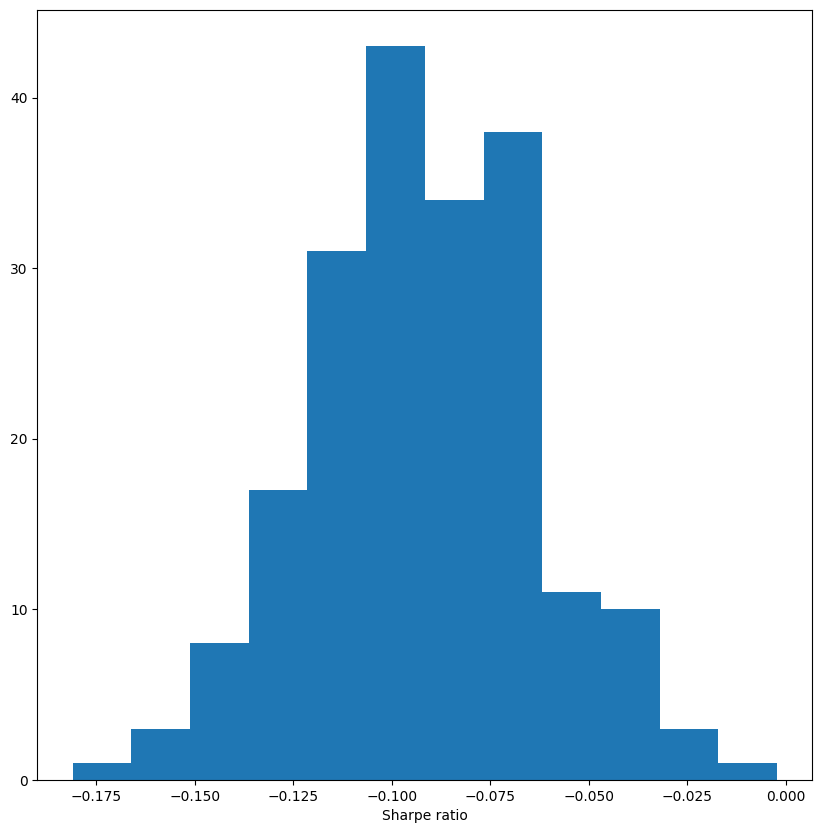

In [145]:
plt.hist(sharpe_indices,bins="rice")
plt.xlabel("Sharpe ratio")

plt.show()

In [146]:
np.mean(sharpe_indices)

-0.09203666361671821